In [124]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import svm, datasets, tree

In [126]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [127]:
nSamples = 2000

center = [np.random.rand(nSamples)-0.5, np.random.rand(nSamples)-0.5]
left = [np.random.rand(nSamples)-1.6, 3*np.random.rand(nSamples)-1.5]
right = [np.random.rand(nSamples)+0.6, 3*np.random.rand(nSamples)-1.5]
bottom = [3*np.random.rand(nSamples)-1.5, np.random.rand(nSamples)-1.6]
top = [3*np.random.rand(nSamples)-1.5, np.random.rand(nSamples)+0.6]
outer = [np.concatenate((
    left[0],
    right[0],
    bottom[0],
    top[0]
)),
np.concatenate((
    left[1],
    right[1],
    bottom[1],
    top[1]
))]

X, y = [], []
for point_x, point_y in zip(outer[0],outer[1]):
    X.append([point_x,point_y])
    y.append(1)
for point_x, point_y in zip(center[0],center[1]):
    X.append([point_x,point_y])
    y.append(0)
    
X = np.matrix(X)
y = np.array(y)

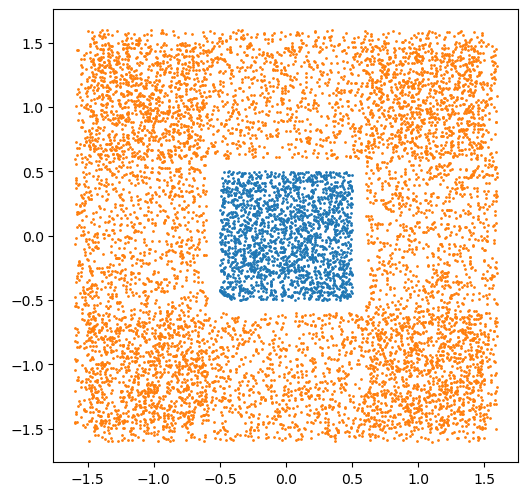

In [128]:
plt.figure(figsize=(6,6),facecolor='white',dpi=100)
plt.plot(center[0],center[1],ls='',marker='o',color='C0',markersize=1)
plt.plot(outer[0],outer[1],ls='',marker='o',color='C1',markersize=1)
plt.show()

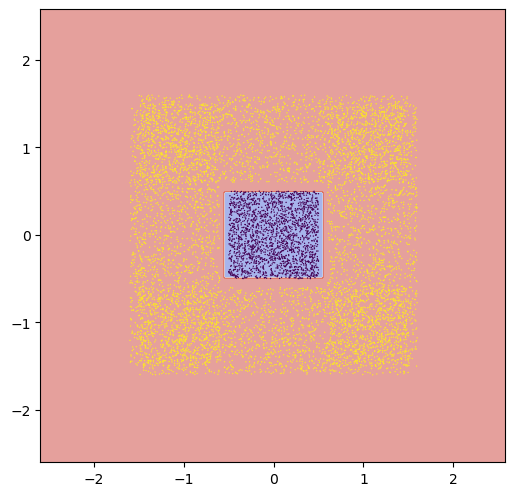

In [129]:
C = 1.0
# clf = svm.SVC(C=C)
# clf = svm.SVC(kernel='linear',C=C)
# clf = svm.LinearSVC(C=C)
# clf = svm.SVC(kernel='poly',C=C)
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

X0, X1 = np.array(X[:,0]), np.array(X[:,1])
xx, yy = make_meshgrid(X0, X1)
fig = plt.figure(figsize=(6,6),facecolor='white',dpi=100)
ax = plt.gca()
plot_contours(ax,clf,xx,yy,cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0,X1,c=y,s=1,ec='None')
plt.show()

